Цели данного модуля:

- Познакомиться с различными способами графического представления данных.
- Освоить основные методы визуализации библиотек Matplotlib и Pandas.
- Научиться настраивать диаграммы в Matplotlib для повышения их информативности.
- Освоить основные методы визуализации библиотеки Seaborn.
- Освоить базовые методы интерактивной визуализации и анимации библиотеки Plotly.
- Научиться выбирать правильные методы визуализации для конкретных задач.

## ЗАЧЕМ НУЖНА ВИЗУАЛИЗАЦИЯ?

Лучший способ отобразить информацию и донести её до других — использовать визуальные методы: графики, диаграммы, тепловые карты и другие приёмы визуализации данных.


    Но в чём преимущество такого варианта представления информации? Не проще ли вставить в годовой отчёт о продажах компании большую таблицу, в которой и можно найти все показатели?

Приведём главные причины использования визуализации:

Визуальное восприятие физиологически является для человека основным.

    По данным учёных (причём не только британских!), с помощью зрения человек получает около 80 % информации.

    Что касается процессов запоминания, то из услышанного человек запоминает в среднем 10 %, из прочитанного — 20 %, а из увиденного — 80 %.

### ЛИНЕЙНЫЙ ГРАФИК (LINEPLOT)

Это самый простой тип графика. Вы, несомненно, рисовали такие на уроках математики в школе.

Линейный график представляет собой последовательность точек, соединённых линией. Каждая точка — это пара координат x и y, которые отображены по осям абсцисс и ординат (в двумерном случае). 

    На практике, в Data Science такие графики чаще всего используются для визуализации временных рядов, например чтобы отследить динамику продаж во времени, число активных пользователей по дням, изменение курса валют и акций.

График бывает особенно полезен, когда вы пытаетесь спрогнозировать ряд и вам необходимо увидеть свой прогноз на графике и сравнить его с действительностью.

Несмотря на свою простоту, при правильном применении линейный график может быть очень информативным и полезным: он позволяет выявить тенденцию движения показателя и найти ключевые точки его роста или падения.

Text(0, 0.5, 'Суммарный объём продаж')

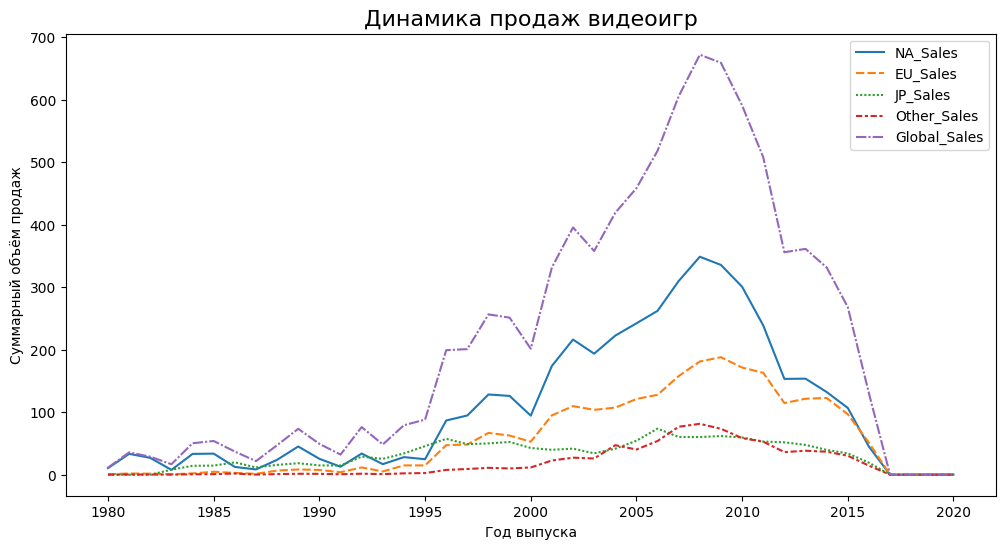

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

Из графика отчётливо виден рост числа продаж видеоигр по всем рынкам примерно до 2007 года, после чего наблюдается резкий спад и неизбежное приближение числа продаж к 0 в 2020 году. Вполне объяснимое явление: именно в этот период наступает эра интернет-магазинов видеоигр и люди постепенно уходят от дисковых накопителей.

На графике можно отследить лидеров продаж, то, как они менялись, какие страны влияют на общие продажи, где абсолютный и относительный прирост продаж в динамике выше, а где — ниже.

### ГИСТОГРАММА (HISTOGRAM)

    Гистограмма — это способ визуализации частоты попадания признака в некоторый численный интервал. Гистограмма состоит из прямоугольников, расположенных вдоль оси x.

Ось разбита на интервалы, их ещё называют корзинами (bins), их число задаётся пользователем. Ширина интервалов одинакова и задаёт ширину прямоугольника.

По оси y откладывается высота прямоугольника — количество наблюдений, которые попали в интервал. Чем выше столбик, тем больше наблюдений находятся в интервале.

Гистограммы часто используются для оценки распределения числового признака, например мы можем понять, как распределены цены на товары, число шагов, которые делает пользователь умных часов, масса метеоритов, падающих на землю.

Text(0, 0.5, 'Тип объекта')

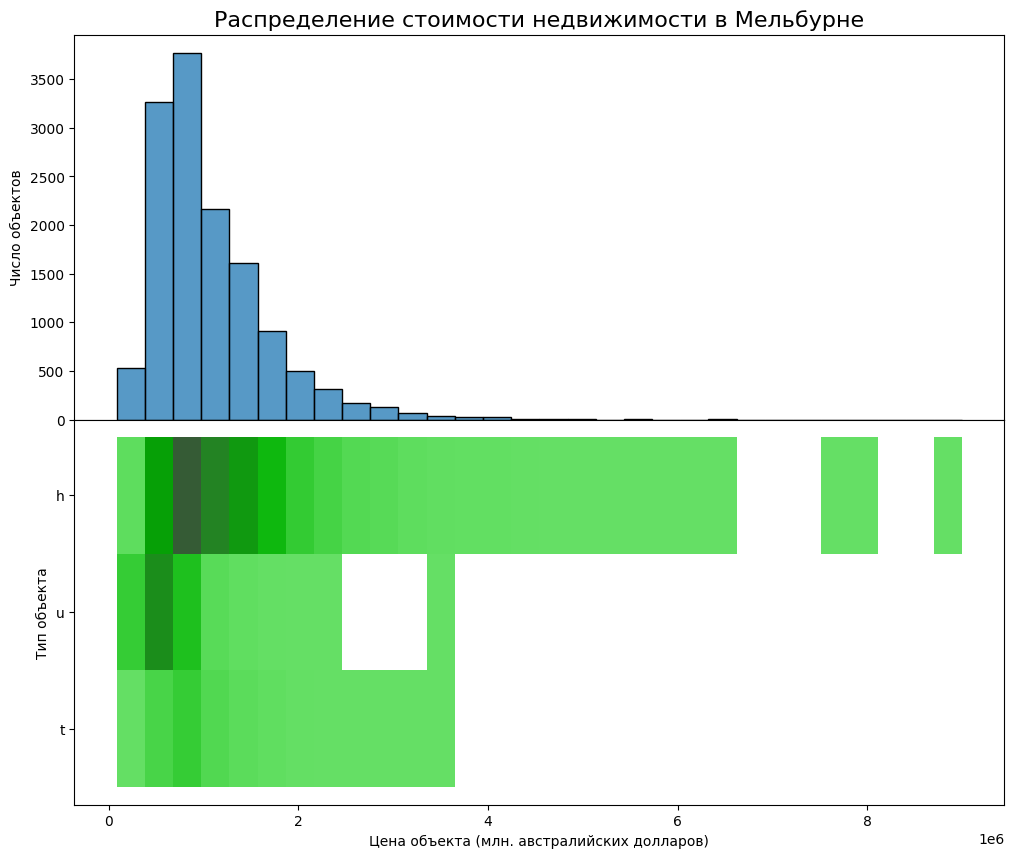

In [45]:
melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')

Во-первых, основная часть цен на объекты сосредоточена в интервале от  0.1 до 2 млн, и наибольшее число цен лежит в интервале от 0.9 до 1.2 млн (самый высокий прямоугольник). Далее при повышении цены количество объектов только падает, что вполне соответствует жизненным реалиям — дорогих и роскошных домов гораздо меньше, чем домов среднего ценового сегмента. Забегая вперёд, в тему теории вероятности, скажем, что данная гистограмма очень напоминает логарифмическое нормальное распределение. Такой вид распределения очень распространён на практике.

Во-вторых, как видно из нижней гистограммы, объекты типа house (h) имеют схожее с общим распределение — их максимальная частота также наблюдается в третьем интервале, после чего идёт постепенное падение частоты (бледные полосы на высоких значениях цен). Цены на объекты типов unit (u) не превышают 4 млн, и их максимум наблюдается во втором интервале. Таунхаусы (t) имеют почти одинаковую частоту в каждом ценовом сегменте.

### ДИАГРАММА РАССЕЯНИЯ (SCATTERPLOT)

    Другое название этого графика — точечная диаграмма.

График представляет собой облака точек: по оси абсцисс откладывается одна числовая переменная, по оси ординат — вторая, а каждая точка на графике — это запись из таблицы.

Диаграммы рассеяния являются стандартным средством визуализации связи между двумя числовыми переменными. Однако через настройки графика в исследование зависимости можно добавить и несколько категориальных переменных.

Диаграммы рассеяния являются мощным инструментом, который очень широко используется в Data Science. С их помощью мы можем увидеть, как зависит (или не зависит) давление от возраста пациента, объём продаж товаров от количества показанной рекламы и т. д.

Оценив взаимосвязь признаков, мы можем принять решение об использовании какого-то из признаков для предсказания.

    Окунёмся немного в орнитологию. На диаграмме рассеяния ниже показана зависимость длины крыльев пингвинов от длины их клюва в миллиметрах. При этом цвет точки на графике зависит от вида пингвина, а размер точки — от пола птицы. Итого на одном графике уместилась зависимость сразу между четырьмя признаками! И это ещё не предел.

Text(0, 0.5, 'Длина крыльев')

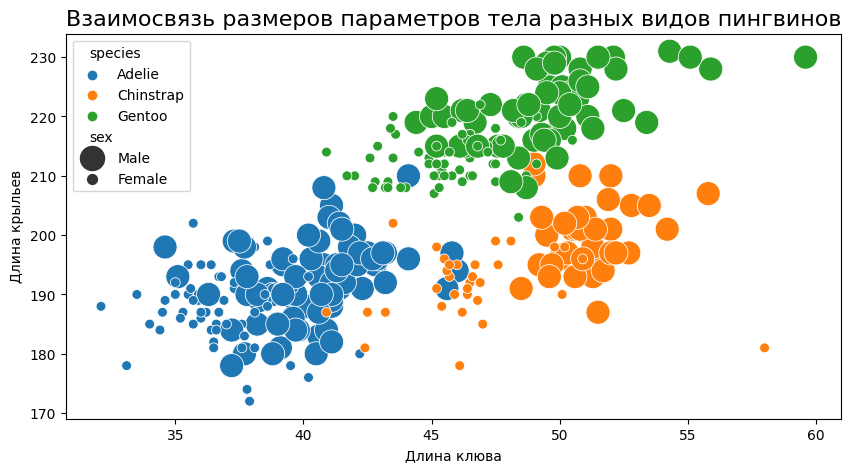

In [46]:
penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина крыльев')

Из диаграммы рассеяния отчётливо видна прямая связь параметров тела пингвина: чем больше длина клюва, тем больше длина крыльев. Причём облака точек разного цвета плотно сгруппированы относительно своих центров, и, основываясь на длине клюва и крыльев и на половой принадлежности птицы, можно достаточно хорошо предсказать вид пингвина. К тому же ярко виден половой диморфизм: длина клюва и крыльев у самцов несколько больше, чем у самок.

### КРУГОВАЯ ДИАГРАММА (PIE CHART)

Синонимичные названия диаграммы — пироговая диаграмма и секторная диаграмма.

    Круговая диаграмма представляет собой круг, разделённый на секторы. Весь круг составляет 100 %. Каждый из секторов отображает долю одной из категорий в данных, размер сектора соответствует части целого от круга.

Диаграмма является способом визуализации для категориального признака: например, можно визуализировать и сравнивать доли от выручки, которые делает каждый продавец. 

    Круговые диаграммы наглядны, когда нужно показать, как делится на части что-либо целое: например, так можно визуализировать вклад каждого из продавцов в выручку магазина. Однако круговые диаграммы неудобны, когда рассматривается больше одного признака — в этом случае приходится добавлять отдельную диаграмму. Из-за большей информативности столбчатых диаграмм специалисты склонны выбирать именно их.

Перед вами диаграмма количества погибших главных и второстепенных персонажей в сериале «Игра престолов» в зависимости от их верности какому-либо из домов. На диаграмме изображены названия семи домов (None — персонаж не принадлежал к определённому дому), а внутри секторов указано количество погибших персонажей в процентах.

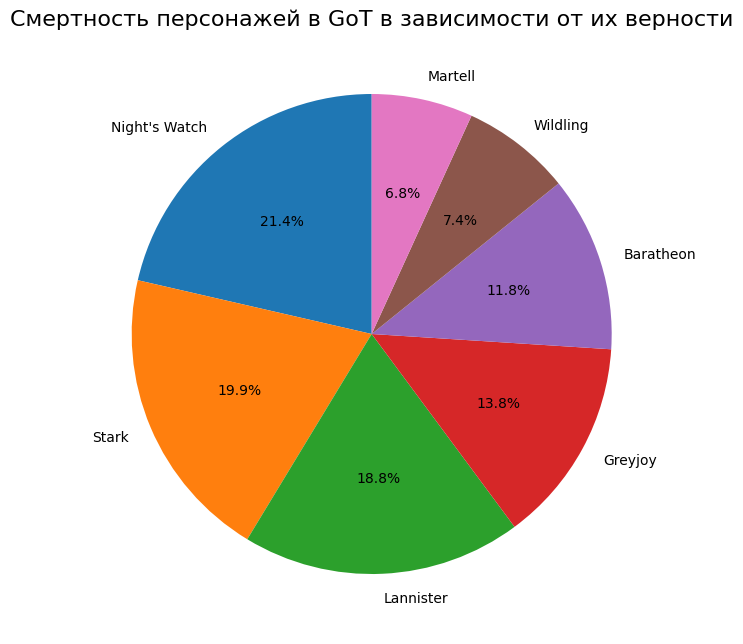

In [47]:
game_of_thrones_df = pd.read_csv('data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

Из представленной диаграммы видно, что большинство погибших в сериале персонажей не принадлежали ни к одному из домов. На популярный вопрос «Кого чаще убивают, верных Старкам или Ланнистерам?» однозначного ответа нет, группы приблизительно одинаковы.

### СТОЛБЧАТАЯ ДИАГРАММА (BAR CHART)

    Столбчатая диаграмма также максимально проста: по оси x откладывается некоторый категориальный признак, для каждой категории которого рассчитан некоторый показатель (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение этого показателя. 

Основное применение столбчатых диаграмм в Data Science — сравнение категорий друг с другом. Например, сравнение ресторанов по суммарной прибыли, сравнение средних расходов пользователей, сравнение медианной стоимости квартир по районам и т. д.

    Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать совместное распределение показателей, тем самым повышая информативность. Такие диаграммы называются многоуровневыми.

ПРИМЕР:

В качестве примера приведём две диаграммы стоимости женского нижнего белья на сайте Amazon.

На левой диаграмме изображены средние цены товаров для каждого бренда. На правой диаграмме изображены те же цены, но с разделением цветом по категориям товаров (Bras — бюстгальтеры, Panties — трусы). Правая диаграмма является многоуровневой столбчатой диаграммой.

C:\Users\Денчік\AppData\Local\Temp\ipykernel_16148\3995455100.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot1 = sns.barplot(
C:\Users\Денчік\AppData\Local\Temp\ipykernel_16148\3995455100.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot2 = sns.barplot(


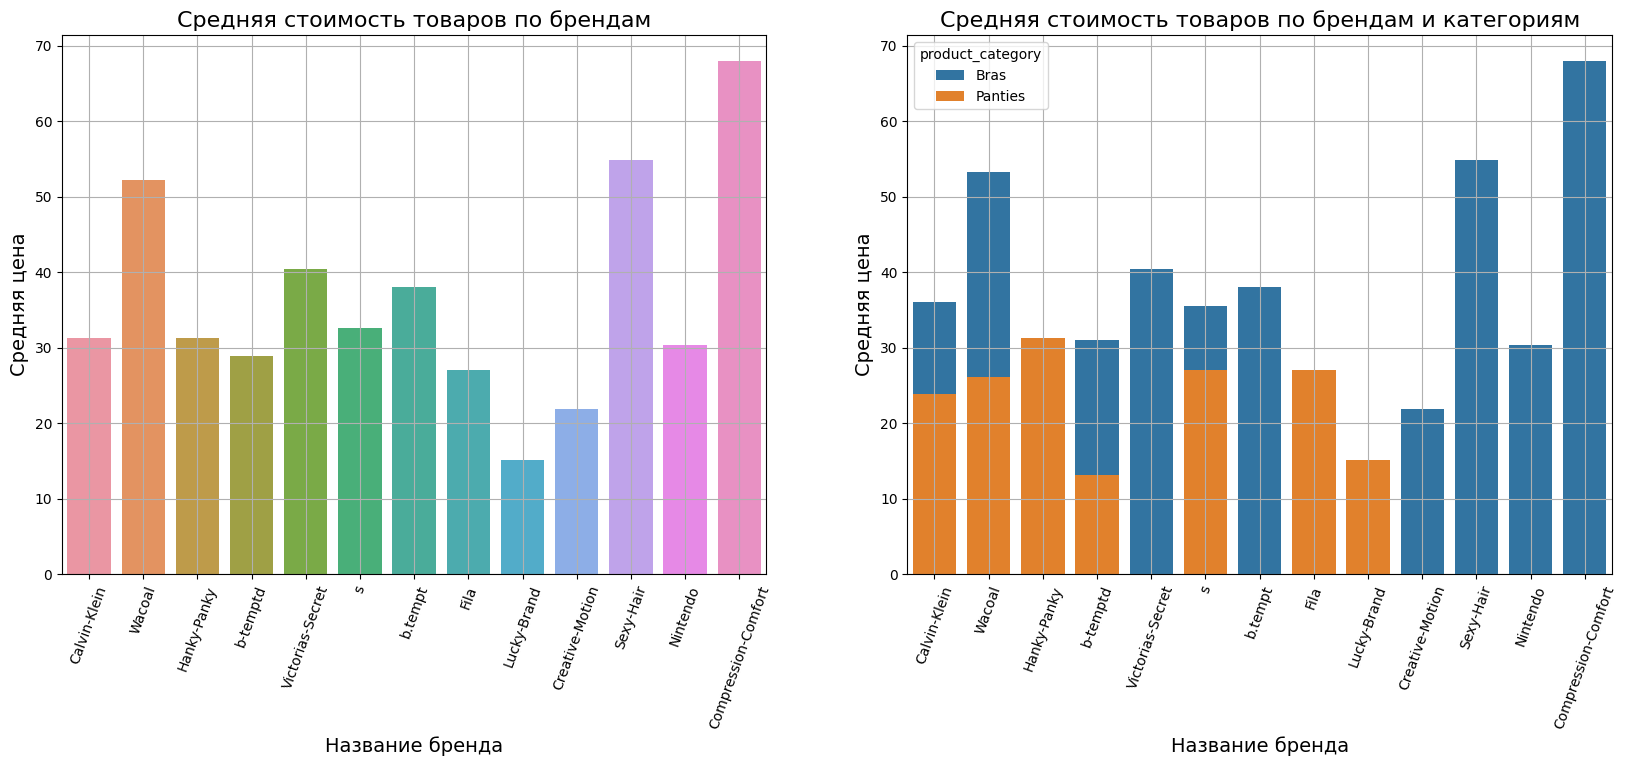

In [125]:
amazon_data = pd.read_csv('data/amazon_com.csv');

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url);
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64');
amazon_data['brand_name'].unique();
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7));
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
);
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid();

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
);
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid();

Из левой диаграммы видно, что наибольшую среднюю цену имеют товары бренда Compression-Comfort, а наименьшую — Lucky-Brand.

Из правого графика можно заметить, что средняя цена трусов всегда ниже средней цены бюстгальтеров.

Кроме того, для некоторых брендов в данных есть информация только о бюстгальтерах или только о трусах (их столбцы окрашены только синим или только оранжевым цветом).

### ТЕПЛОВАЯ КАРТА (HEATMAP)

    Тепловая карта — это графическое представление некоторой таблицы, где значения в ячейках выделяются определённым цветом или интенсивностью цвета. Таблицей может быть как DataFrame, так и, например, изображение.

Способы применения тепловых карт разнообразны: от визуализации категорий объектов на изображениях до графического представления матриц.

При исследовании табличных данных тепловые карты чаще всего применяются для визуализации сводных таблиц.

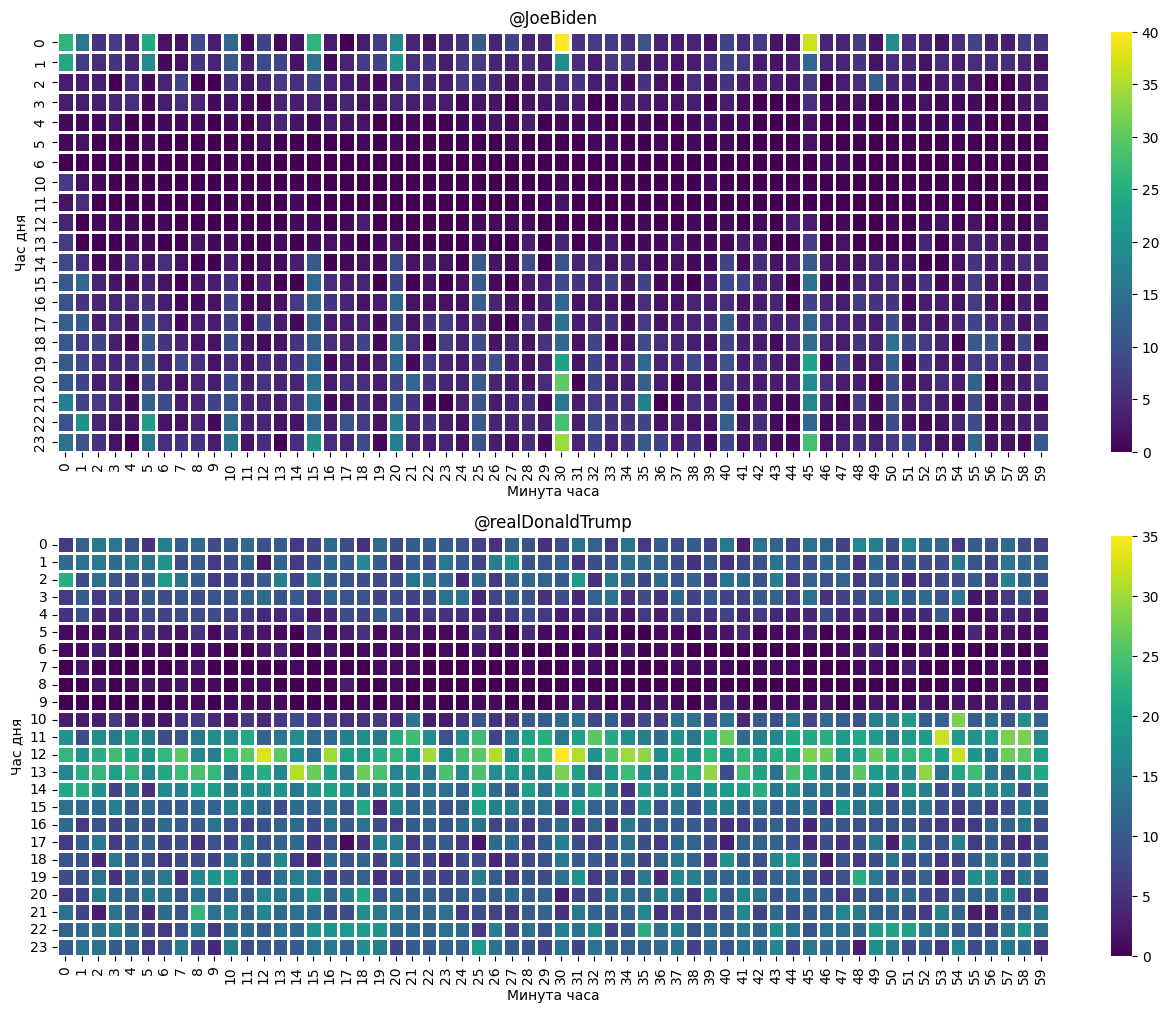

In [49]:
tweets_df = pd.read_csv("data/biden_trump_tweets.csv", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

Тёмная полоса, соответствующая первой половине дня, говорит о том, что оба кандидата не заходят в Twitter по утрам.

У Дональда Трампа тепловая карта намного ярче, чем у Джо Байдена, что говорит о том, что Трамп выкладывает твиты намного чаще.

Кроме того, можно сказать, что Байден предпочитает посещать соцсети в конце дня — основная масса его твитов сделана после семи часов вечера.

### КОРОБЧАТАЯ ДИАГРАММА (BOXPLOT, BOX AND WHISKER PLOT)

Синонимичные названия диаграммы — ящик с усами и диаграмма размаха.

    Коробчатые диаграммы, которые были введены в употребление Джоном Тьюки в 1977 году, являются новым типом диаграмм для исследования распределения числового признака по отношению к предыдущим. Диаграмма основана на понятии квантилей.

Коробчатая диаграмма ниже иллюстрирует зависимость возраста пользователей компании CitiBike от типа пользователя (Customer — клиент с подпиской на 24 часа или на три дня, Subscriber — подписчик с годовой арендой велосипеда).


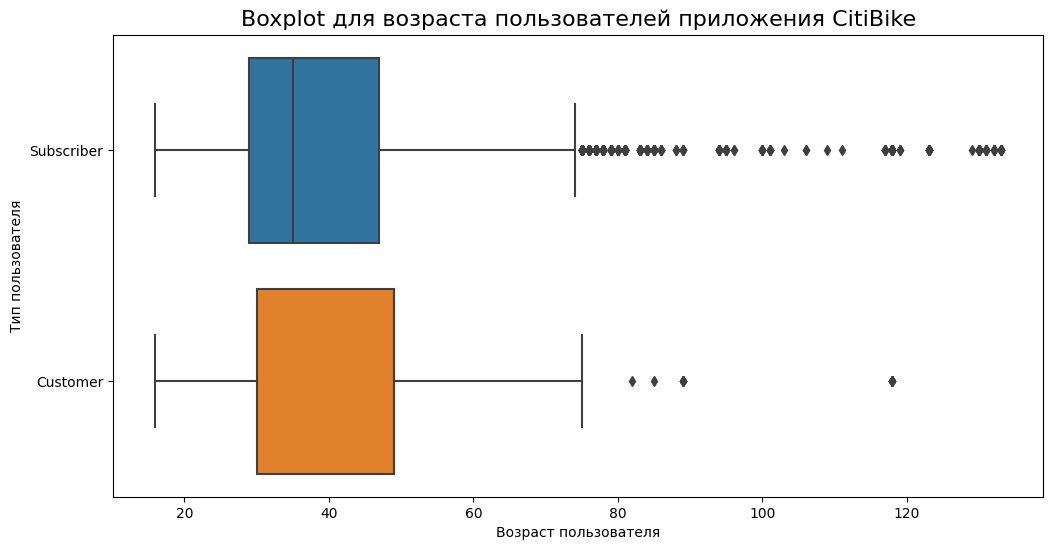

In [121]:
citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя');

Для обеих групп пользователей приложения длина ящика с усами примерно одинакова: от 16 до 75 лет (левая и правая граница). Причём медианный возраст подписчиков с годовой арендой составляет 35 лет, а медианный возраст для клиентов с подпиской на 24 часа одинаков с 75 % квантилью и равен 49 годам (линия внутри ящика совпадает с правой линией его границы).

Ещё один интересный факт: число потенциальных выбросов по возрасту среди группы Subscriber значительно больше, чем в группе Customer. Можно предположить, что пользователи с возрастом 100+ — это люди, которые намеренно или ошибочно указали неверный возраст, и среди подписчиков их больше. Этот факт нуждается в дальнейшем исследовании.

# Знакомимся с новыми данными: коронавирус

In [51]:
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


Мы будем работать со следующими столбцами:

- date — дата наблюдения;
- province/state — наименование провинции/штата;
- country — наименование страны;
- confirmed — общее число зафиксированных случаев на указанный день;
- deaths — общее число зафиксированных смертей на указанный день;
- recovered — общее число выздоровлений на указанный день.

In [52]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
vaccinations_data.head()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


### ПРЕДОБРАБОТКА ДАННЫХ

Опираясь на замечания выше, выполним небольшую предобработку.

В таблице covid_data:

- 1
Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [53]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

- 2
Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

In [54]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

- 3
Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [55]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

- 4
Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [56]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()


Итоговый вид таблицы covid_data:

In [57]:
display(covid_data)
covid_data['date'].min()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Timestamp('2020-01-22 00:00:00')

In [58]:
covid_data['date'].max()

Timestamp('2021-05-29 00:00:00')

В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

In [59]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data)

# vaccinations_data['date'].min()

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.00,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...
42790,Zimbabwe,2021-09-01,4270430.0,2615233.0,17.33,1655197.0,10.97,36416.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42791,Zimbabwe,2021-09-02,4323735.0,2649505.0,17.56,1674230.0,11.09,39711.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42792,Zimbabwe,2021-09-03,4372216.0,2681657.0,17.77,1690559.0,11.20,42317.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
42793,Zimbabwe,2021-09-04,4400246.0,2698332.0,17.88,1701914.0,11.28,41413.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [60]:
vaccinations_data['date'].max()
print(vaccinations_data.shape[0])
print(covid_data.shape[0])


42795
86785


С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.

In [71]:
keys = ['date','country']

covid_df = covid_data.merge(
    vaccinations_data,
    on=keys,
    how='left'
    )


covid_dfc = covid_df.copy()
display(covid_dfc)


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

In [79]:
covid_dfc['death_rate'] = (covid_dfc['deaths']/covid_dfc['confirmed'])*100
covid_dfc['recover_rate'] = (covid_dfc['recovered']/covid_dfc['confirmed'])*100

display(covid_dfc)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.

In [117]:
usadeaths1 = covid_dfc['country'] == 'United States'

covid_dfc = covid_dfc.fillna(0)
covid_dfc[usadeaths1].sort_values(
    by='death_rate',
    ascending=False,
    ignore_index=bool)



,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-03-04,United States,153.0,11.0,8.0,134.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.189542,5.228758
1,2020-05-15,United States,1444045.0,87982.0,250747.0,1105316.0,25117.0,1625.0,4333.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.092746,17.364210
2,2020-05-14,United States,1418928.0,86357.0,246414.0,1086157.0,27013.0,1795.0,2984.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.086073,17.366209
3,2020-05-13,United States,1391915.0,84562.0,243430.0,1063923.0,20723.0,1700.0,13143.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.075227,17.488855
4,2020-05-16,United States,1469104.0,89191.0,268376.0,1111537.0,25059.0,1209.0,17629.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.071115,18.268006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2020-02-12,United States,13.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,23.076923
490,2020-02-13,United States,15.0,0.0,3.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,20.000000
491,2020-02-14,United States,15.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,20.000000
492,2020-02-15,United States,15.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,20.000000


In [114]:
rus = covid_dfc['country'] == 'Russia'

# covid_dfc = covid_dfc.fillna(0)
covid_dfc[rus].sort_values(
    by='recover_rate',
    
    )
 
covid_dfc['recover_rate'].mean()
# covid_dfc.info()

65.04607328681809

Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

In [116]:
covid_dfc = covid_dfc.fillna(0)
usadeaths1 = covid_dfc['country'] == 'Russia'
russia_data = covid_dfc[usadeaths1]
average_recovery_rate = round(russia_data['recover_rate'].mean(), 2)
print(average_recovery_rate)

67.06


Дальнейшая работа будет проводиться с таблицей covid_df — результатом объединения таблиц covid_data и vaccinations_data.

Оказывается, за способами визуализации данных не нужно далеко ходить. Базовую (примитивную) визуализацию можно выполнить с помощью уже знакомой нам библиотеки Pandas. Функционал для создания основных типов графиков уже включён в библиотеку. С изучения возможностей Pandas мы и начнём наше погружение в программную визуализацию.

### БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS

Основным методом для создания простейших графиков в Pandas является plot().

- x — название признака, который будет отложен по оси абсцисс;
- y — название признака, который будет отложен по оси ординат;
- figsize — размер графика (кортеж из ширины и высоты в дюймах);
- kind —тип визуализации. Основные типы:
    - 'line' — линейный график (по умолчанию);
    - 'bar' — столбчатая диаграмма;
    - 'barh' — горизонтальная столбчатая диаграмма;
    - 'hist' — гистограмма;
    - 'box' — коробчатая диаграмма (boxplot);
    - 'pie' — круговая диаграмма;
    - 'scatter' — диаграмма рассеяния.
- grid — отображение сетки (по умолчанию False);
- legend — отображение легенды (по умолчанию False);
- title — название графика;
- color — цвет.

Давайте попрактикуемся в использовании метода plot().

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

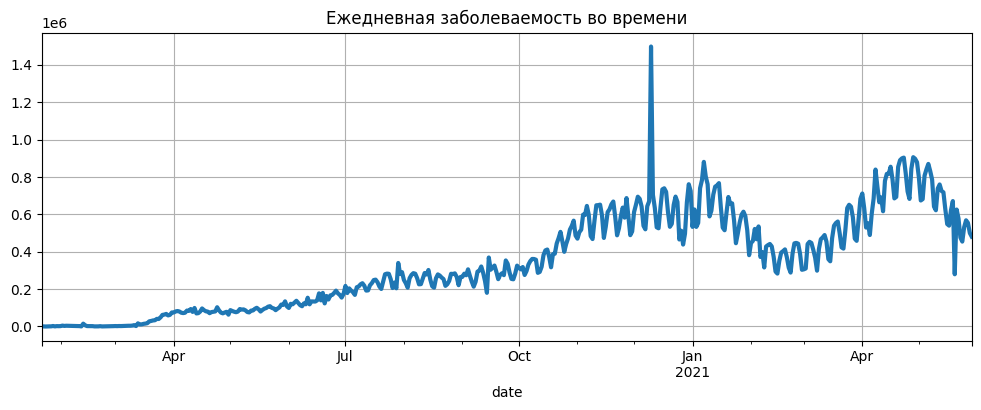

In [120]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

На графике выше отчётливо виден умеренный начальный рост заболеваемости, после чего наблюдается её резкое повышение в середине октября 2020 года, а в декабре 2020 года — аномальная вспышка коронавируса (зафиксировано более 1.4 млн. заболевших в день). Такой резкий максимум, возможно, является ошибкой в данных и требует более детального разбора. Далее заметно постепенное уменьшение числа ежедневно фиксируемых случаев и наступление второй волны в марте 2021 года. Наконец, начиная с мая 2021 года наблюдается очередной спад.

Пилообразность графика (подъёмы и спады с периодом в 7 дней) может быть связана с рабочими и выходными днями.

Нам неизвестно, как устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что:

- спад в выходные обусловлен меньшей интенсивностью работы медицинских служб;
  
- в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берётся/проводится меньше тестов, к понедельнику они ещё не готовы и диагноз ещё не поставлен;

- минимум в понедельник может быть запаздыванием подсчёта статистики, т.е. на самом деле данные за понедельник — это данные за воскресенье.

Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

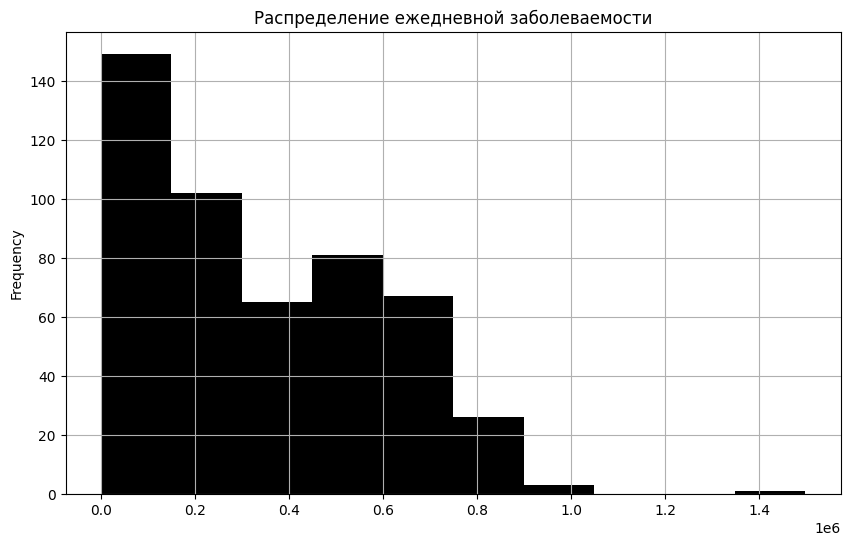

In [126]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.

В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

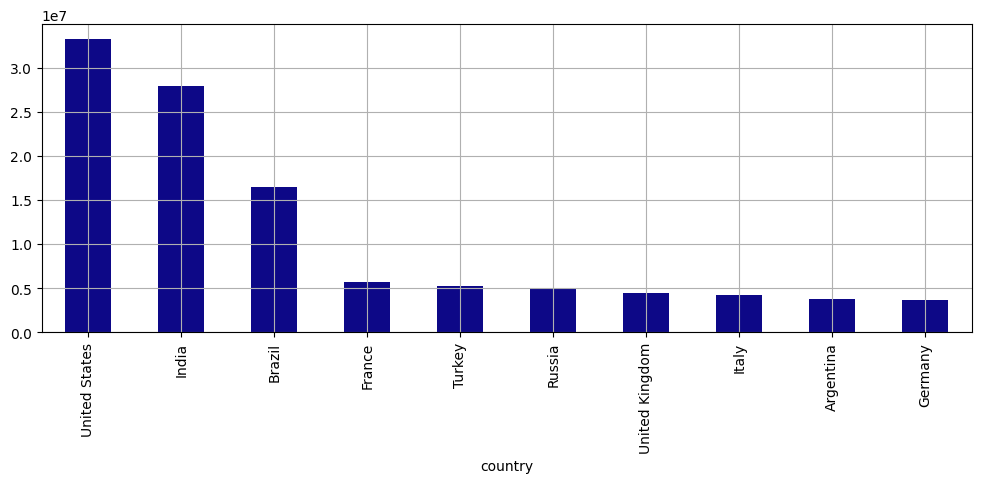

In [127]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

На диаграмме видно, что лидерами по числу заболевших являются Соединённые Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаковое.

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

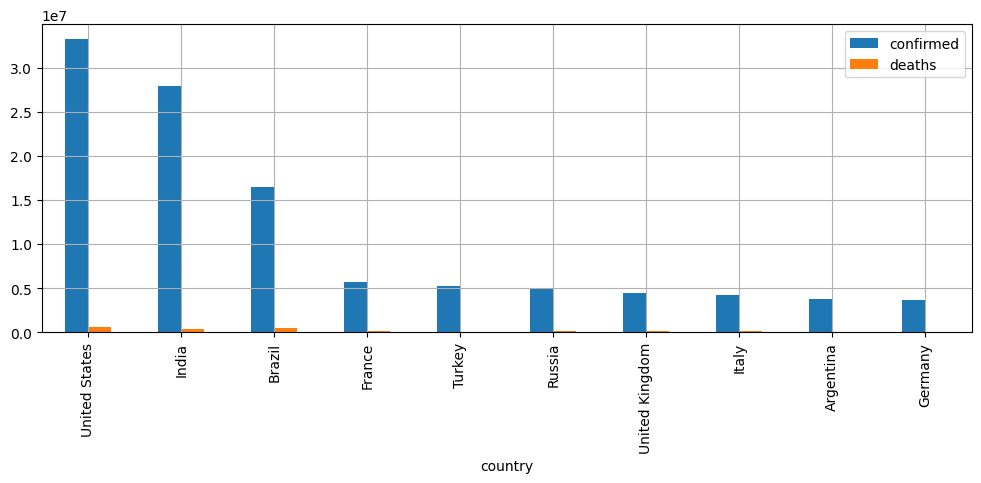

In [128]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!

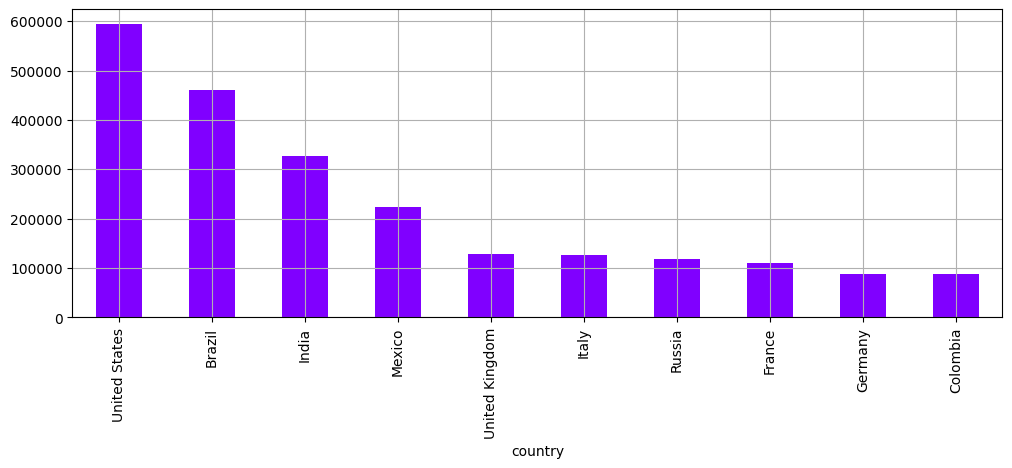

In [133]:
grouped_country = covid_df.groupby(['country'])['deaths'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='rainbow'
);

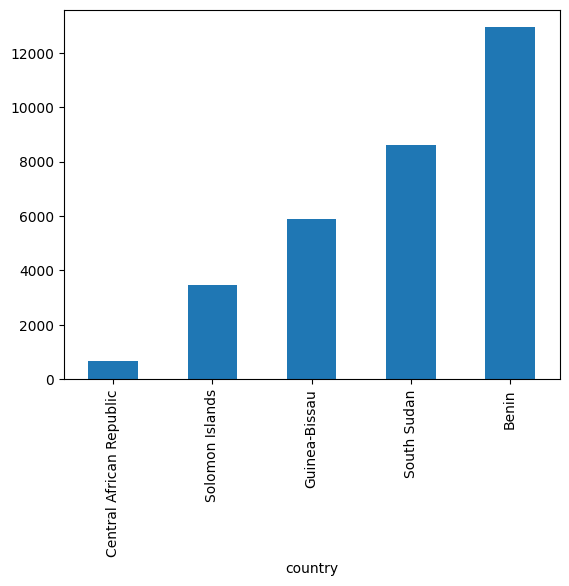

In [134]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');